<a href="https://colab.research.google.com/github/don-06don/MOOCs-Dataset/blob/main/01.MOOCs_Correlation_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
from sklearn.preprocessing import LabelEncoder, StandardScaler
drive.mount('/content/drive')
df = pd.read_excel('/content/drive/MyDrive/moocs.xlsx')

Mounted at /content/drive


# **📊 Correlation Analysis (Before Scaling)**

Target = Urgency(1–7)

 post_type shows the strongest (though still weak) relationship with Urgency, followed by CourseType, while course_display_name_encoded has the weakest effect.


**-Multicollinearity Concern:**

CourseType ↔ course_display_name_encoded = 0.93 → very strong correlation, meaning these features carry nearly the same information.

Keeping both may cause multicollinearity issues in modeling.



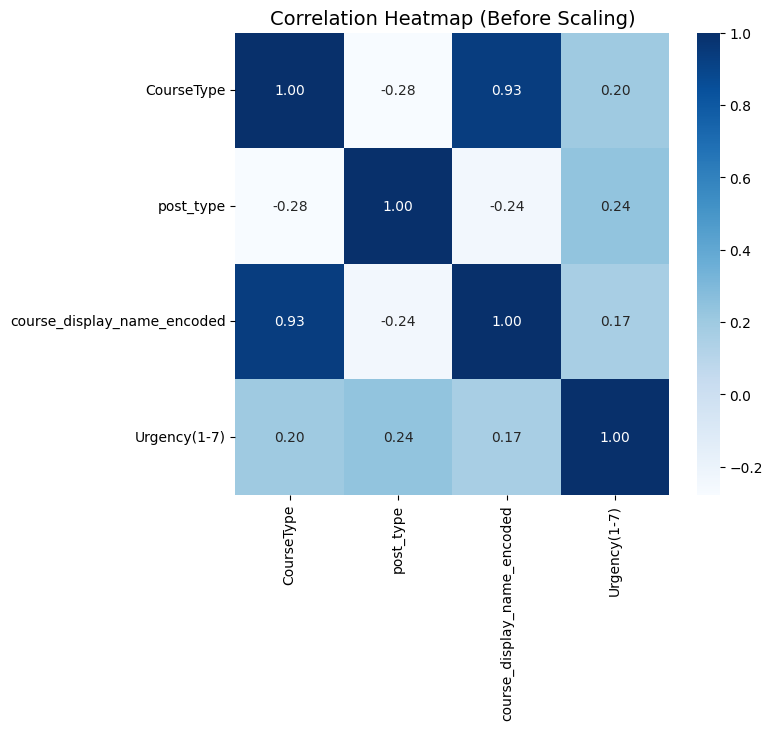

In [8]:
categorical_cols = ["CourseType", "post_type"]
target_col = "Urgency(1-7)"
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col].astype(str))

le_course = LabelEncoder()
df['course_display_name_encoded'] = le_course.fit_transform(df['course_display_name'].astype(str))

numeric_cols = categorical_cols + ['course_display_name_encoded', target_col]

corr_before = df[numeric_cols].corr()
plt.figure(figsize=(7,6))
sns.heatmap(corr_before, annot=True, cmap="Blues", fmt=".2f")
plt.title("Correlation Heatmap (Before Scaling)", fontsize=14)
plt.show()

# **📊 Correlation Analysis (After Scaling)**

The correlation heatmap remains exactly the same after scaling.

**-Reason:**

Scaling methods (e.g., StandardScaler, MinMaxScaler) only change the range/units of features, not the linear relationships between them.

Correlation coefficients are scale-invariant.

➡️ Therefore, scaling does not affect the correlation matrix, which is why the "before" and "after" heatmaps look identical.

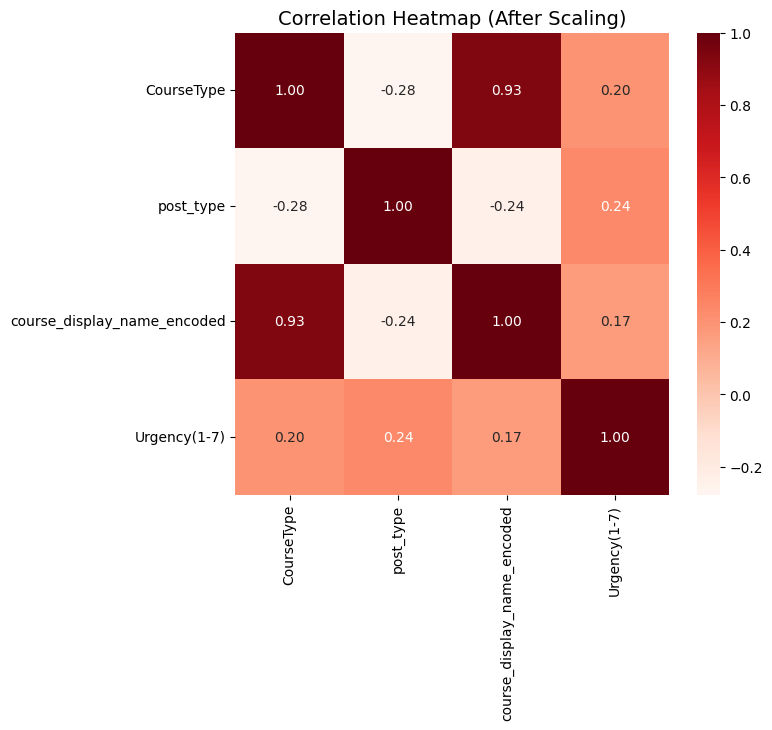

In [9]:
scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[numeric_cols] = scaler.fit_transform(df[numeric_cols])

corr_after = df_scaled[numeric_cols].corr()
plt.figure(figsize=(7,6))
sns.heatmap(corr_after, annot=True, cmap="Reds", fmt=".2f")
plt.title("Correlation Heatmap (After Scaling)", fontsize=14)
plt.show()